In [83]:
from keras.datasets import mnist
from matplotlib import pyplot

In [84]:
import tensorflow
#print(tensorflow._version_)

In [85]:
(train_X , train_Y) , (test_X , test_Y) = mnist.load_data()

In [86]:
print(str(train_X.shape))
print(str(train_Y.shape))
print(str(test_X.shape))
print(str(test_Y.shape))


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


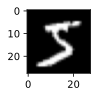

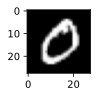

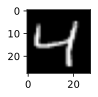

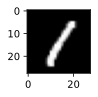

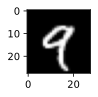

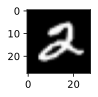

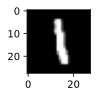

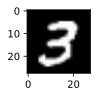

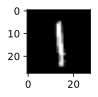

In [87]:
for i in range(9) :
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [88]:
train_X.shape
test_X.dtype
train_Y.dtype
test_Y.dtype

dtype('uint8')

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import keras as keras

In [90]:
train_X,train_Y = train_X[:10000]/255.0 , train_Y[:10000]

In [91]:
train_X.shape
train_Y.shape

(10000,)

In [92]:
from keras.callbacks import ModelCheckpoint

In [93]:
def create_model():
  model = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(300, activation='sigmoid'),
                      Dense(100, activation='relu'), 
                      Dense(10, activation='softmax'),
       ])
  return model
#checkpoint = ModelCheckpoint(filepath='tmp_weights.best.hdf5',monitor='accuracy' , verbose=1 , save_best_only= True , mode='max' , callback_list = [checkpoint])
  
  


In [94]:
model = create_model()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_55 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_56 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [95]:

import tensorflow as tf

sgd = SGD(learning_rate=0.01, decay=0, momentum=0.9, nesterov=False)
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

In [96]:
history_constant = model.fit(
    train_X,
    train_Y,
    epochs=100,
    validation_split = 0.2,
    batch_size = 64,
)

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 2.2519 - accuracy: 0.2309 - val_loss: 2.1632 - val_accuracy: 0.3655
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 2.0989 - accuracy: 0.4836 - val_loss: 2.0124 - val_accuracy: 0.6005
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 1.9354 - accuracy: 0.5959 - val_loss: 1.8370 - val_accuracy: 0.6710
Epoch 4/100
125/125 [==============================] - 1s 4ms/step - loss: 1.7421 - accuracy: 0.6578 - val_loss: 1.6402 - val_accuracy: 0.6770
Epoch 5/100
125/125 [==============================] - 0s 4ms/step - loss: 1.5329 - accuracy: 0.6989 - val_loss: 1.4208 - val_accuracy: 0.7220
Epoch 6/100
125/125 [==============================] - 0s 4ms/step - loss: 1.3302 - accuracy: 0.7330 - val_loss: 1.2307 - val_accuracy: 0.7400
Epoch 7/100
125/125 [==============================] - 0s 4ms/step - loss: 1.1564 - accuracy: 0.7639 - val_loss: 1.0803 - val_accuracy: 0.7780

In [97]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metrics(history , metric):
  train_metrics = history.history[metric]
  val_metrics = history.history['val_' + metric]
  epochs = range(1, len(train_metrics) + 1)
  plt.plot(epochs , train_metrics)
  plt.plot(epochs , val_metrics)
  plt.title('Training and Validation' + metric)
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train " + metric , 'val_'+metric])
  plt.show()

In [98]:
import matplotlib.pyplot as plt

def plot_lr(history):
  learning_rate = history.history['lr']
  epochs = range(1 , len(learning_rate) + 1)
  plt.plot(epochs , learning_rate)
  plt.title('Learning Rate')
  plt.xlabel('Epochs')
  plt.ylabel('Learning rate')
  plt.show()

In [99]:
model = create_model()

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

In [100]:
from tensorflow.keras.callbacks import LearningRateScheduler

intial_learning_rate = 0.01
epochs = 100
decay = intial_learning_rate / epochs

def lr_time_based_decay(epoch , lr):
  return lr * 1 / (1 + decay * epoch)

history_time_based_decay = model.fit(
    train_X,
    train_Y,
    epochs = 100,
    validation_split = 0.2,
    batch_size = 64,
    callbacks = [LearningRateScheduler(lr_time_based_decay , verbose=1)],
)


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
125/125 [==============================] - 1s 5ms/step - loss: 2.2133 - accuracy: 0.3019 - val_loss: 2.1043 - val_accuracy: 0.4995
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.009998999876494932.
125/125 [==============================] - 1s 4ms/step - loss: 2.0010 - accuracy: 0.5726 - val_loss: 1.8877 - val_accuracy: 0.6185
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.009997000136010244.
125/125 [==============================] - 0s 4ms/step - loss: 1.7737 - accuracy: 0.6619 - val_loss: 1.6541 - val_accuracy: 0.7150
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.009994001785933966.
125/125 [==============================] - 1s 4ms/step - loss: 1.5381 - accuracy: 0.7215 - val_loss: 1.4235 - val_accuracy: 0.7425
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.009990006056679388.
1

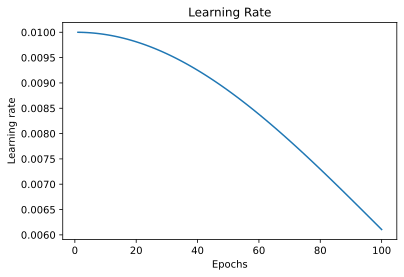

In [101]:
plot_lr(history_time_based_decay)

In [102]:
def create_model():
  model = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(300, activation='softmax'),
                      Dense(100, activation='softmax'), 
                      Dense(10, activation='softmax'),
       ])
  return model
  
  


In [82]:
import math
model = create_model()

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

def lr_exp_decay(epoch, lr):
  k = 0.1111
  return intial_learning_rate * math.exp(-k * epoch)

  tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

history_exp_decay = model.fit(
    train_X,
    train_Y,
    epochs = 200,
    validation_split = 0.2,
    batch_size = 64,
    callbacks= [LearningRateScheduler(lr_exp_decay , verbose=1)],
)

Epoch 1/200

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
125/125 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1060 - val_loss: 2.3022 - val_accuracy: 0.1105
Epoch 2/200

Epoch 00002: LearningRateScheduler setting learning rate to 0.008948492595286827.
125/125 [==============================] - 0s 4ms/step - loss: 2.3022 - accuracy: 0.1133 - val_loss: 2.3018 - val_accuracy: 0.1105
Epoch 3/200

Epoch 00003: LearningRateScheduler setting learning rate to 0.008007551972790317.
125/125 [==============================] - 0s 4ms/step - loss: 2.3018 - accuracy: 0.1133 - val_loss: 2.3015 - val_accuracy: 0.1105
Epoch 4/200

Epoch 00004: LearningRateScheduler setting learning rate to 0.0071655519534888565.
125/125 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1133 - val_loss: 2.3012 - val_accuracy: 0.1105
Epoch 5/200

Epoch 00005: LearningRateScheduler setting learning rate to 0.00641208885969381.
125/125 [========

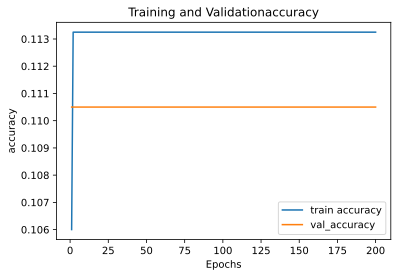

In [103]:
plot_metrics(history_exp_decay , 'accuracy')

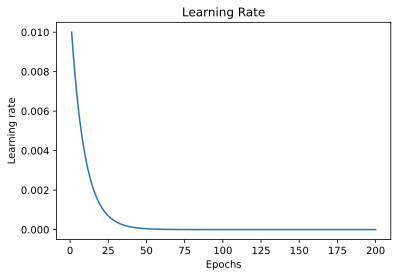

In [104]:
plot_lr(history_exp_decay)

In [105]:
def create_model():
  model = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(300, activation='sigmoid'),
                      Dense(100, activation='sigmoid'), 
                      Dense(10, activation='sigmoid'),
       ])
  return model
  
  


In [106]:
!pip install -U tensorflow-addons
import tensorflow_addons as tfa

In [107]:
model = create_model()
model.summary()
import tensorflow as tf

sgd = SGD(learning_rate=0.01, decay=0, momentum=0.9, nesterov=False)
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tfa.optimizers.LazyAdam(0.001),
              metrics=['accuracy'])

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_61 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [108]:
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [109]:
history_constant = model.fit(
    train_X,
    train_Y,
    epochs=150,
    validation_split = 0.2,
    batch_size = 64,
)

Epoch 1/150
125/125 [==============================] - 1s 5ms/step - loss: 1.4023 - accuracy: 0.6669 - val_loss: 0.7261 - val_accuracy: 0.8490
Epoch 2/150
125/125 [==============================] - 1s 4ms/step - loss: 0.5102 - accuracy: 0.8863 - val_loss: 0.4423 - val_accuracy: 0.8910
Epoch 3/150
125/125 [==============================] - 1s 4ms/step - loss: 0.3419 - accuracy: 0.9161 - val_loss: 0.3681 - val_accuracy: 0.8950
Epoch 4/150
125/125 [==============================] - 1s 4ms/step - loss: 0.2794 - accuracy: 0.9220 - val_loss: 0.3313 - val_accuracy: 0.9000
Epoch 5/150
125/125 [==============================] - 0s 4ms/step - loss: 0.2393 - accuracy: 0.9342 - val_loss: 0.3135 - val_accuracy: 0.9070
Epoch 6/150
125/125 [==============================] - 1s 4ms/step - loss: 0.2098 - accuracy: 0.9410 - val_loss: 0.3022 - val_accuracy: 0.9130
Epoch 7/150
125/125 [==============================] - 1s 4ms/step - loss: 0.1879 - accuracy: 0.9456 - val_loss: 0.2962 - val_accuracy: 0.9165

In [110]:
def create_model():
  model = Sequential([
                      Flatten(input_shape=(28,28)),
                      Dense(300, activation='relu'),
                      Dense(100, activation='relu'), 
                      Dense(10, activation='relu'),
       ])
  return model
  
  


In [111]:
model = create_model()
model.summary()
import tensorflow as tf

sgd = SGD(learning_rate=0.05, decay=0, momentum=0.9, nesterov=False)
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_64 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [112]:
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [113]:
history_constant = model.fit(
    train_X,
    train_Y,
    epochs=30,
    validation_split = 0.2,
    batch_size = 64,
)


Epoch 1/30
125/125 [==============================] - 1s 5ms/step - loss: 7.1601 - accuracy: 0.1025 - val_loss: 5.2635 - val_accuracy: 0.1075
Epoch 2/30
125/125 [==============================] - 0s 4ms/step - loss: 5.2157 - accuracy: 0.1024 - val_loss: 5.2034 - val_accuracy: 0.1050
Epoch 3/30
125/125 [==============================] - 1s 4ms/step - loss: 5.1948 - accuracy: 0.1020 - val_loss: 5.1886 - val_accuracy: 0.1045
Epoch 4/30
125/125 [==============================] - 1s 5ms/step - loss: 5.0828 - accuracy: 0.1015 - val_loss: 5.0725 - val_accuracy: 0.1040
Epoch 5/30
125/125 [==============================] - 0s 4ms/step - loss: 5.0461 - accuracy: 0.1005 - val_loss: 5.1728 - val_accuracy: 0.1030
Epoch 6/30
125/125 [==============================] - 1s 4ms/step - loss: 5.2135 - accuracy: 0.1929 - val_loss: 5.2699 - val_accuracy: 0.1970
Epoch 7/30
125/125 [==============================] - 0s 4ms/step - loss: 5.0309 - accuracy: 0.1894 - val_loss: 5.0571 - val_accuracy: 0.1880
Epoch 